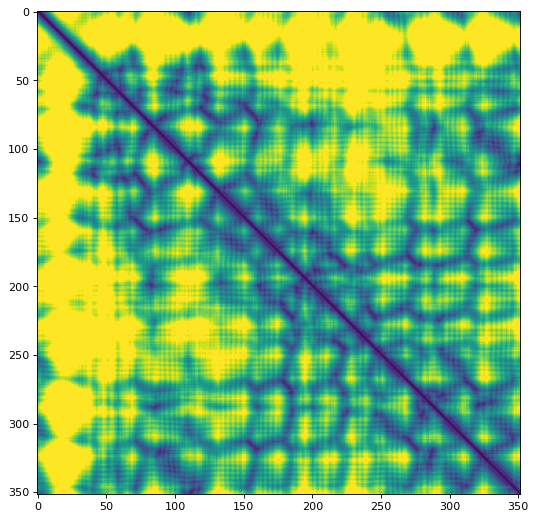

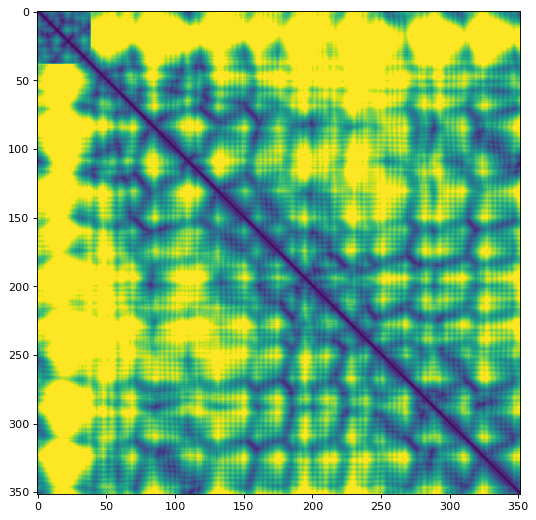

In [4]:
import util


x = util.distm_pdb('replace_distm/agma_alphafold.pdb')
y = util.distm_pdb('replace_distm/agma_random.pdb')
x.shape, y.shape
util.plot_image(x)
A,B=0,39

#crds = util.mds_coord(x); util.plot_chain(crds)
x[A:B,A:B] = y
util.plot_image(x)
#crds = util.mds_coord(x); util.plot_chain(crds)
#print(crds)

#util.plot_image(y)
#1-40
#313-533

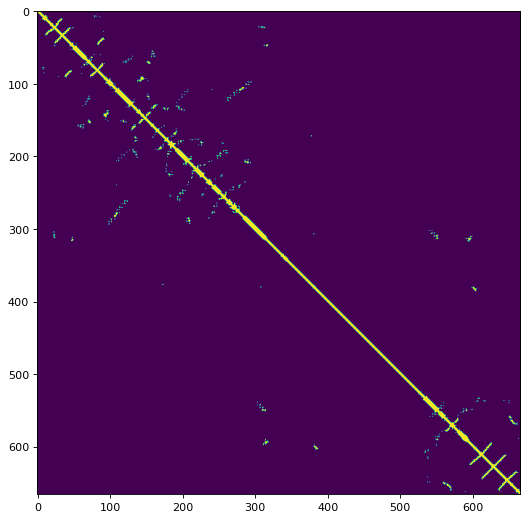

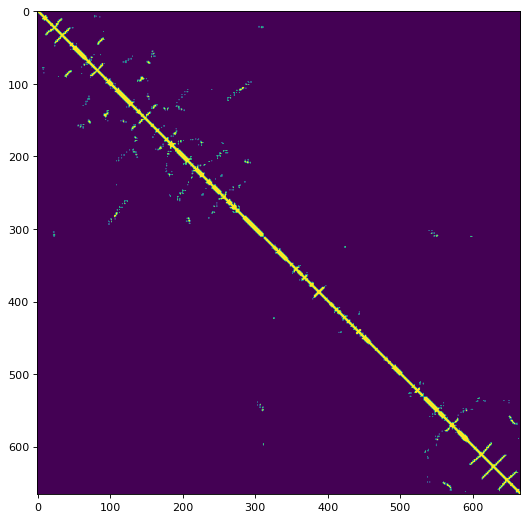

In [19]:
import util

x = util.distm_pdb('replace_distm/cdpk_alphafold.pdb')
y = util.distm_pdb('replace_distm/cdpk_random.pdb')
x.shape, y.shape
util.plot_image(x<8)
A,B=312,532

#crds = util.mds_coord(x[:300,:300]); util.plot_chain(crds)

x[A:B+1,A:B+1] = y
M = x.max()
x[B:,A:B] = M
x[A:B,B:] = M
x[A:B,:A] = M
x[:A,A:B] = M
#x[:,B:] = M
#print(y.shape, x[A:B+1, A:B+1].shape)
util.plot_image(x<8)
#crds = util.mds_coord(x[:300,:300]); util.plot_chain(crds)


#util.plot_image(y)
#1-40
#313-533

In [ ]:
new1 = util.distm_pdb('cdpk_model1.pdb')
util.plot_image(new1)

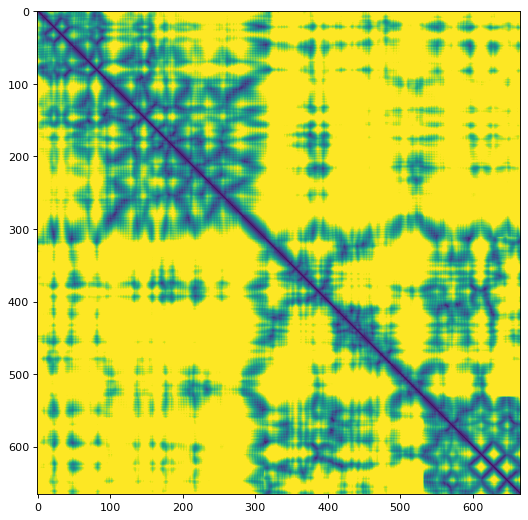

In [6]:
import util
A,B=312,532
af2 = util.distm_pdb('replace_distm/cdpk_alphafold.pdb')

new1 = util.distm_pdb('cdpk_model1.pdb')
new1[B:,B:] = af2[B:,B:]
#util.plot_image(new1)

new2 = util.distm_pdb('cdpk_model1.pdb')
new2[B:,:] = af2[B:,:]
new2[:,B:] = af2[:,B:]
#util.plot_image(new2)

new3= util.distm_pdb('cdpk_model1.pdb')
M = new3.max()
new3[B:,:] = M
new3[:,B:] = M
new3[B:,B:] = af2[B:,B:]
#util.plot_image(new3)

new4= util.distm_pdb('cdpk_model1.pdb')
M = new3.max()
new4[B:,:A] = af2[B:,:A]
new4[:A,B:] = af2[:A,B:]
#new4[:,B:] = M
new4[B:,B:] = af2[B:,B:]
util.plot_image(new4)


In [ ]:
new4
x

In [35]:
import dcon_format
seq = util.fasta_parse('replace_distm/cdpk.fasta')[0][1]
dcon_format.create_rr(seq, new4, 'cdpk_test1res12.rr')

In [ ]:
import util
m = util.writeFileToList('cdpk_test2.rr')
m = [ x.split()[:2] for x in m[1:]]
m = [ [int(n) for n in x] for x in m]
import torch

check = torch.zeros(666,666)
for i,j in m:
    check[i,j] = 1
    check[j,i] = 1
for i in range(666):
    check[i,i] = 1
    
util.plot_image(check.bool())
util.plot_image(new4<8)
util.plot_image(x<8)
x.sum(), check.sum()

In [ ]:
test1 = util.distm_pdb('cdpk_test1_model1.pdb')
test2 = util.distm_pdb('cdpk_test2_model1.pdb')
util.plot_image(test1)
util.plot_image(test2)


1. How random is the process of prediction from this method?
  * Running cdpk_test1 and cdpk_test2 again to check
3. What is the effect of testing with different parameters? ca, cutoff dist 8/12
  * Running cdpk_test1_res12
  (Create new rr with res 12)  
2. Can we split and combine the two?
  * Running cdpk_split1, cdpk_split2
  (Create new fasta,ss,rr)